In [2]:
import data.imgs as img_data
import os.path as osp
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal # https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/
import csv
import data

In [3]:
# 1. Correlation month and average pixel value

In [4]:
train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")

In [5]:
with open(osp.join(osp.dirname(data.__file__), 'patch_names'), newline='') as f:
    reader = csv.reader(f)
    patch_name_data = list(reader)
patch_names = patch_name_data[0]

In [32]:
def flatten_image_from_path(path):
    img_path = osp.join(train_data_path, path + ".tif")

    dataset = gdal.Open(img_path)
    if dataset is None:
        return None
    data = dataset.ReadAsArray()
    return data[0].flatten()

In [48]:
monthly_patches = [[p + f"_S2_{x:02}" for p in patch_names] for x in range(0, 12)]

In [ ]:
monthly_averages = [0] * 12
month_dict = {}

for month_index, month_data in enumerate(monthly_patches):

    month_total = []
    for patch in month_data:

        if flatten_image_from_path(patch) is not None:
            x = np.average(flatten_image_from_path(patch))
            month_total.append(x)

    # monthly_averages[month_index] = np.average(month_total)
    month_dict[month_index] = month_total

In [ ]:
import pandas as pd

df_monthly = pd.DataFrame.from_dict(month_dict)
# df_monthly

Text(0.5, 1.0, 'Boxplot of monthly average pixels')

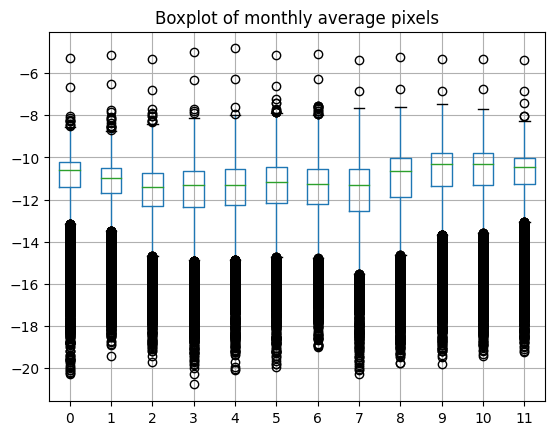

In [47]:
df_monthly.boxplot()
plt.title("Boxplot of monthly average pixels")